<a href="https://colab.research.google.com/github/syed-ateeb-naveed/ML-CEP/blob/main/ML_CEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML CEP

This is a car price prediction model made using supervised learning algorithms.

In [43]:
import numpy as np
import pandas as pd

##Importing data as DataFrame

In [44]:
car = pd.read_csv("/content/sample_data/quikr_car.csv")
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [45]:
car.shape

(892, 6)

In [46]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##Data Cleaning

###Company Column

In [47]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

Inconsistent and invalid company names

In [48]:
#Capitalizing first letter of all company names
car["company"] = car["company"].str.lower()
car["company"] = car["company"].str.capitalize()
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'Bmw', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'Force', 'Mercedes', 'Land', 'Yamaha', 'Selling',
       'Urjent', 'Swift', 'Used', 'Jaguar', 'Jeep', 'Sale', 'Very',
       'Volvo', '2012', 'Well', 'All', '7', '9', 'Scratch', 'Urgent',
       'Sell', 'Any', 'Tara'], dtype=object)

In [49]:
#Filtering invalid company names
invalid_companies = ['Any', 'Sell', 'Sale', 'Used', 'Scratch', 'Very', 'Urjent', 'Urgent', 'Land', 'Jeep', 'Commercial', 'Selling', '2012', 'Well', 'All', '7', '9']
car = car[~car['company'].isin(invalid_companies)]


In [50]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'Bmw', 'Nissan', 'Hindustan', 'Fiat',
       'Force', 'Mercedes', 'Yamaha', 'Swift', 'Jaguar', 'Volvo', 'Tara'],
      dtype=object)

###Year Column

In [51]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', '/-Rs', 'sale', '1995',
       'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'Eon', 'emi',
       'car', 'o...', 'd...', 'SALE', 'digo', 'e...', 'cent', 'cab',
       't xe', 'EV2', 'zest'], dtype=object)

Year column contains non-numeric values

In [52]:
#Removing non-numeric values
car = car[car['year'].str.isnumeric()]
car["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [53]:
#Converting to type int
car["year"] = car["year"].astype(int)
car["year"].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [54]:
car["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 840, dtype: int64

###Price Column

In [55]:
car["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

Price values are in strings and have commas in them. Third row has the value 'Ask for Price'.

In [56]:
#Removing commas
car['Price'] = car['Price'].str.replace(',', '')

In [57]:
#Getting rid from 'Ask For Price' values
car=car[car['Price']!='Ask For Price']

In [58]:
#Converting to type int
car['Price'] = car['Price'].astype(int)


In [59]:
car['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 817, dtype: int64

In [60]:
car["Price"].unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

###kms_driven Column

In [61]:
car["kms_driven"].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

Many inconsistencies. Invalid values as well as string values having 'kms' in them.

In [62]:
#Getting rid of commas and 'kms'
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [63]:
#Filtering non-numeric values
car=car[car['kms_driven'].str.isnumeric()]

In [64]:
#Converting to type int
car['kms_driven']=car['kms_driven'].astype(int)

<ipython-input-64-9188081d7890>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].astype(int)


In [65]:
car['kms_driven'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [66]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 815, dtype: int64

###Fuel type column

In [67]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

Fuel type column has nan values

In [68]:
car=car[~car['fuel_type'].isna()]

In [69]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [70]:
car['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 814, dtype: object

###Name Column

In [71]:
car['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Maruti Suzuki Alto 800 Vxi', 'Hyundai i20 Sportz 1.2',
       'Maruti Suzuki Alto 800 Lx', 'Maruti Suzuki Vitara Brezza ZDi',
       'Maruti Suzuki Alto LX', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift Dzire ZDi', 'Mahindra Scorpio S10 4WD',
       'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

#Cleaned Data

In [72]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


#Exploratory data analysis (EDA)

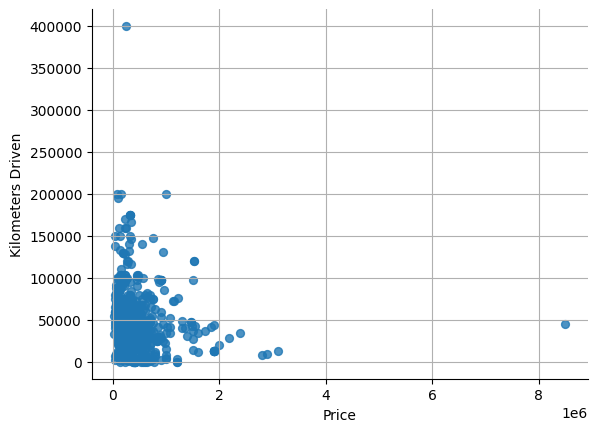

In [73]:
import pandas as pd
import matplotlib.pyplot as plt




# Plotting the scatter plot
car.plot(kind='scatter', x='Price', y='kms_driven', s=32, alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Kilometers Driven')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()


**Conclusion:**


*   High Price Outlier: There is a single point around 8,000,000 units for the price and approximately 100,000 kilometers driven. This indicates a high-value car that has moderate mileage.
*   High Mileage Outlier: Another single point stands out at around 400,000 kilometers driven with a price below 2,000,000 units. This is likely a vehicle with extremely high usage, reflecting a low resale value due to the high mileage.









The high-price outlier might be a luxury vehicle that retains significant value despite its mileage.
The high-mileage outlier represents a car that has been used extensively, resulting in a lower market price.

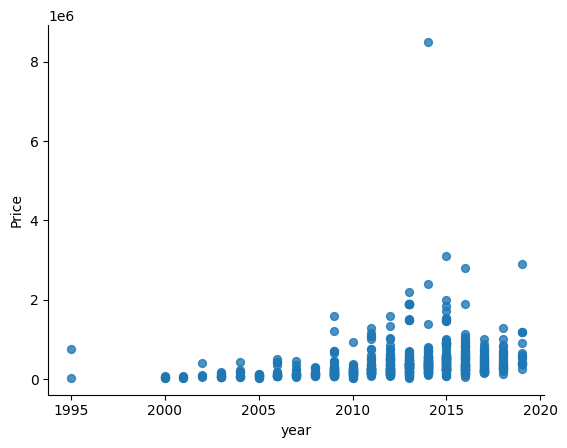

In [79]:
# @title year vs Price

from matplotlib import pyplot as plt
car.plot(kind='scatter', x='year', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Conclusion:**

*   1995-2000: Car prices are generally low, with very few high-priced outliers.
*   2000-2005: There is a slight increase in the number of cars, with prices remaining relatively low.
*   2005-2010: Car prices start to increase, with a more significant number of higher-priced cars appearing.
*   2010-2015: There is a noticeable rise in both the number of cars and their prices, with many cars priced between 1,000,000 and 2,000,000 units.
* 2015-2020: While the number of cars remains high, there is a mix of prices, with some cars priced above 2,000,000 units and a few outliers reaching up to 8,000,000 units.












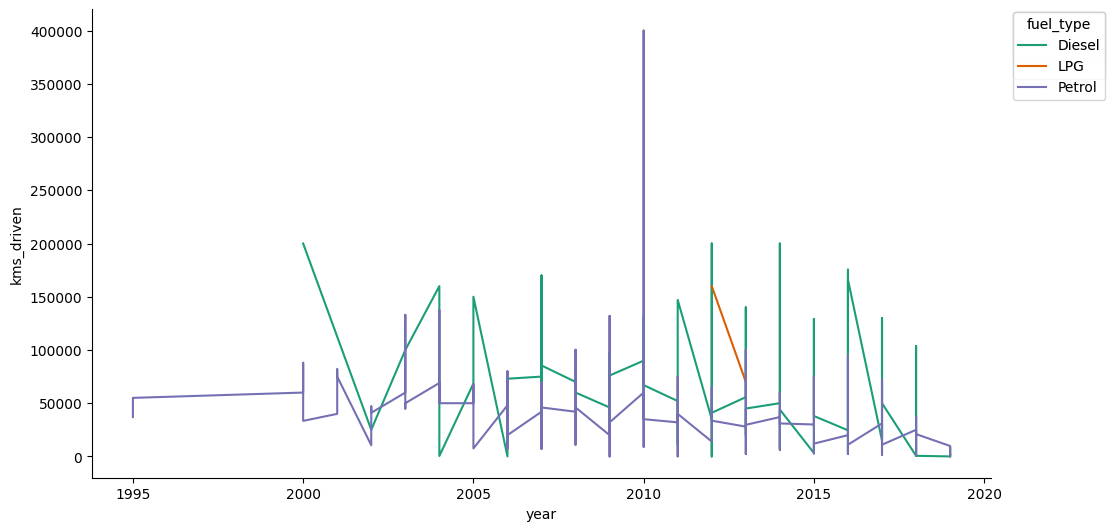

In [80]:
# @title year vs kms_driven

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['kms_driven']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = car.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fuel_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='fuel_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('kms_driven')

**Conclusion:**


*   1995-2000: Petrol cars show low and consistent mileage around 50,000 kilometers, with some minor variations. Diesel cars are less frequent with variable mileage.
*   2000-2005: There is an increase in the variability of kilometers driven for both petrol and diesel cars, with petrol cars showing slightly higher mileage spikes.
*   2005-2010: Both petrol and diesel cars exhibit high variability in mileage, with peaks reaching up to 200,000 kilometers. LPG cars start appearing with moderate mileage.
*   2010-2015: The mileage for petrol and diesel cars continues to be highly variable, with some peaks exceeding 250,000 kilometers. LPG cars show limited data points with moderate mileage.
*   2015-2020: The variability in mileage for petrol and diesel cars decreases slightly, with fewer extreme peaks. LPG cars are present but less frequent, maintaining moderate mileage.

In summary, the plot shows significant variability in mileage for petrol and diesel cars over the years, with peaks during 2005-2015, while LPG cars consistently show moderate mileage.







<ipython-input-74-6b36b0272a61>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(car, x='kms_driven', y='fuel_type', inner='box', palette='Dark2')


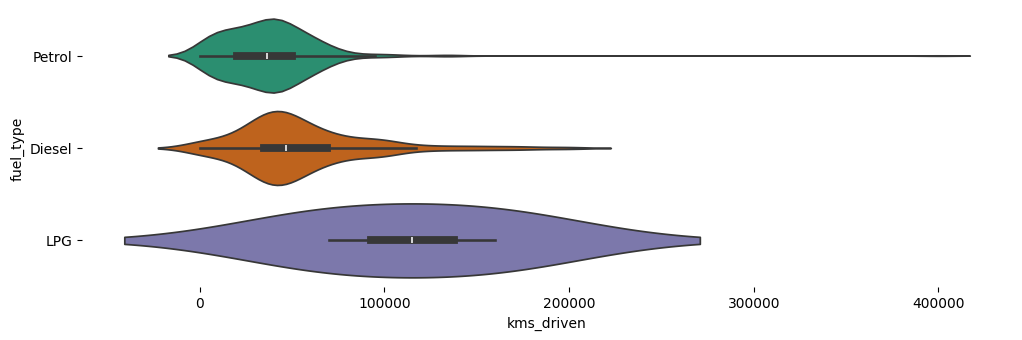

In [74]:
# @title fuel_type vs kms_driven

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(car['fuel_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(car, x='kms_driven', y='fuel_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Conclusion:**

*   Petrol Cars: Most petrol cars have been driven between 50,000 and 100,000 kilometers, with some outliers reaching up to 400,000 kilometers.
*   Diesel Cars: Diesel cars typically have lower mileage than petrol cars, peaking around 50,000 kilometers, with some reaching up to 300,000 kilometers.
*   LPG Cars: LPG cars have a consistent mileage distribution, mostly between 50,000 and 100,000 kilometers, without extreme high-mileage outliers.











<ipython-input-75-af25406a08cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(car, x='Price', y='fuel_type', inner='box', palette='Dark2')


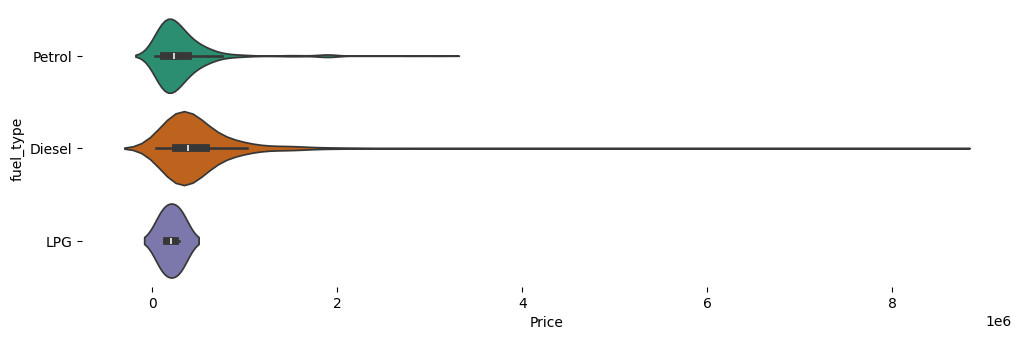

In [75]:
# @title fuel_type vs Price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(car['fuel_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(car, x='Price', y='fuel_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Conclusion:**


*   Petrol Cars: The prices of petrol cars are widely distributed, with most prices concentrated below 2,000,000 units.
*   Diesel Cars: Diesel cars also show a wide price distribution, but the majority of prices are below 1,500,000 units.
*   LPG Cars: LPG cars have a much narrower price range, with most prices concentrated below 500,000 units.





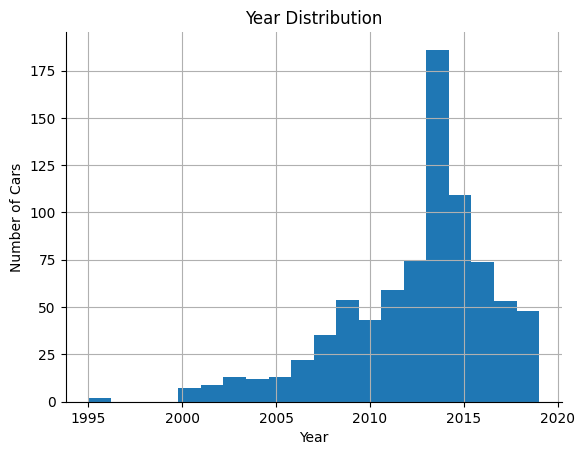

In [76]:
# @title year

from matplotlib import pyplot as plt

# Plotting the histogram for the 'year' column
car['year'].plot(kind='hist', bins=20, title='Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()


**Conclusion:**

1995 to 2005, indicating older models are rare. There is a gradual increase in cars from 2005 to 2010, reflecting a growing presence of mid-2000s models. The number of cars peaks sharply between 2010 and 2015, with 2014 being the most represented year, suggesting a high volume of cars from this period. After 2015, the number of cars starts to decline but still shows a significant presence of recent models up to 2020.



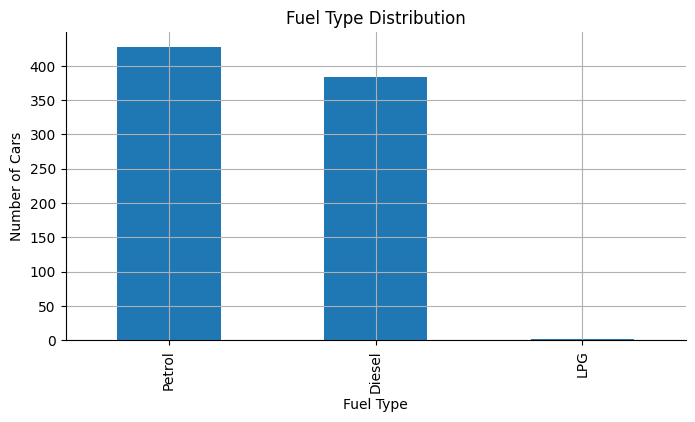

In [78]:
# @title kms_driven
import matplotlib.pyplot as plt

# Plotting the fuel type distribution
fuel_type_counts = car['fuel_type'].value_counts()
fuel_type_counts.plot(kind='bar', figsize=(8, 4), title='Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()


**Conclusion:**

*   Number of Petrol Cars: Petrol cars are the most common in the dataset, with over 400 cars.
*   Number of Diesel Cars: Diesel cars are also well-represented, with just slightly fewer than petrol cars, totaling slightly below 400 cars.
*   Number of LPG Cars: LPG cars are rare in the dataset, with fewer than 50 cars.






